# Homework 3: Improving the Pipeline
- Using outcomes and projects data from the donors choose database from 2011-2013
- The goal is to predict, at posting time of a project, if a project will not get fully funded so we can intervene and help them improve the project listing. 

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")

In [15]:
%run preprocess.py
%run models.py
%run explore.py
%run features.py

In [4]:
#outcomes = read_file('data/outcomes.csv', index='projectid')
#projects = read_file('data/projects.csv', index='projectid')
#outcomes = outcomes.fully_funded.to_frame()
#joined = join_df(outcomes, projects)
#joined.date_posted = pd.to_datetime(joined.date_posted)
#df = joined[(joined.date_posted <= datetime(2013, 12, 31)) & (joined.date_posted >= datetime(2011, 1, 1))]
#df.to_pickle('data/joined2011_2013.pkl')

## Load Data

In [3]:
df = read_file('data/joined2011_2013.pkl')

In [4]:
copy = df.copy()

## Exploring the Data

### Check Data Types & Missing Values

In [5]:
df.dtypes

fully_funded                                      object
teacher_acctid                                    object
schoolid                                          object
school_ncesid                                    float64
school_latitude                                  float64
school_longitude                                 float64
school_city                                       object
school_state                                      object
school_zip                                       float64
school_metro                                      object
school_district                                   object
school_county                                     object
school_charter                                    object
school_magnet                                     object
school_year_round                                 object
school_nlns                                       object
school_kipp                                       object
school_charter_ready_promise   

In [6]:
missing = check_missing(df)

Missing Values:
school_ncesid 24858 float64
school_metro 43021 object
school_district 429 object
primary_focus_subject 35 object
primary_focus_area 35 object
secondary_focus_subject 116086 object
secondary_focus_area 116086 object
resource_type 42 object
grade_level 6 object
students_reached 101 float64


### Check Distribution of Label

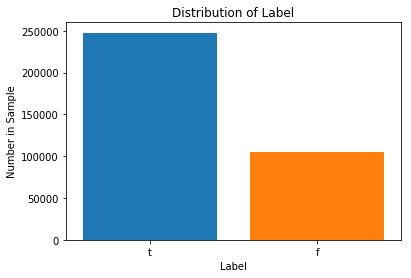

In [8]:
for col in PREDICTED:
    plot_hist(df, col, 'Label', sort=True)

### Explore Temporal Element of Data

In [9]:
disaggregate_thyme(df, 'date_posted', 'year')

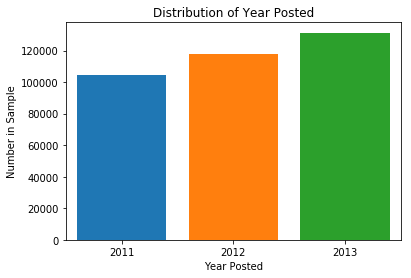

In [10]:
plot_hist(df, 'date_posted_year', 'Year Posted', sort=False)

In [11]:
disaggregate_thyme(df, 'date_posted', 'month')

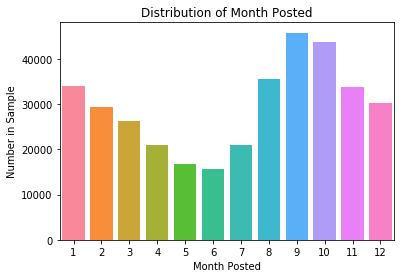

In [12]:
plot_hist(df, 'date_posted_month', 'Month Posted', sort=False)

### Histograms for Categorical Variables

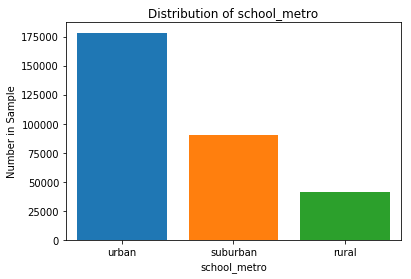

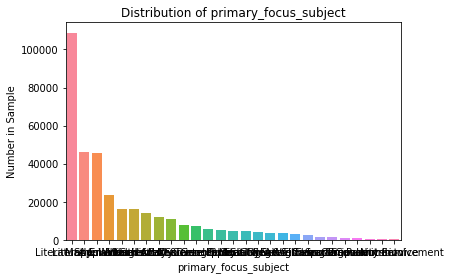

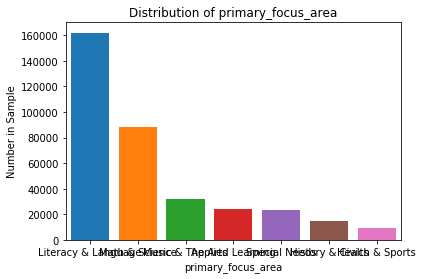

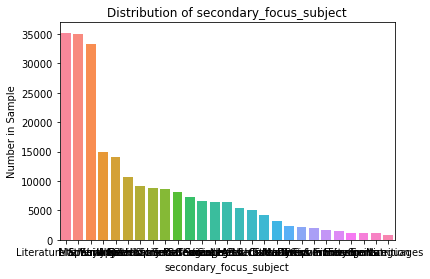

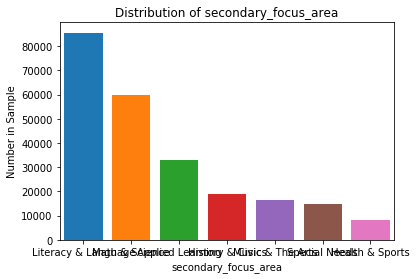

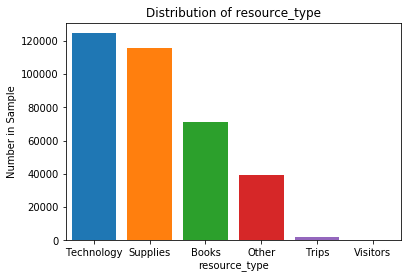

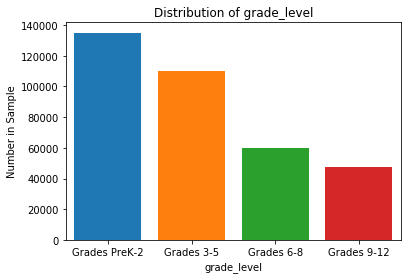

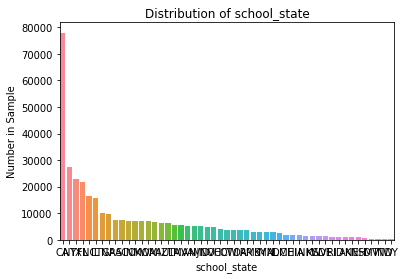

KeyboardInterrupt: 

In [13]:
for col in CATEGORICAL:
    plot_hist(df, col, col)

### Plot Binary

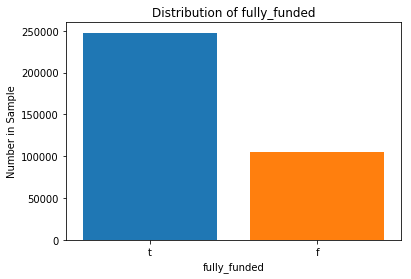

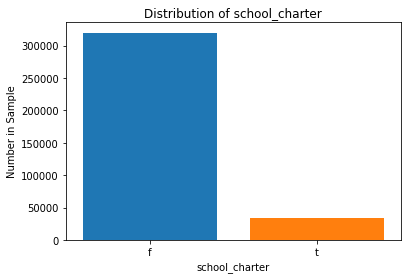

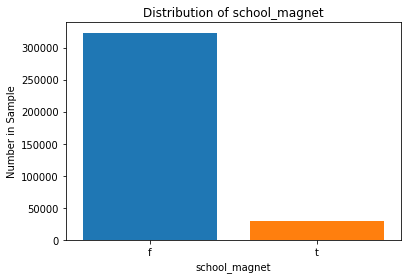

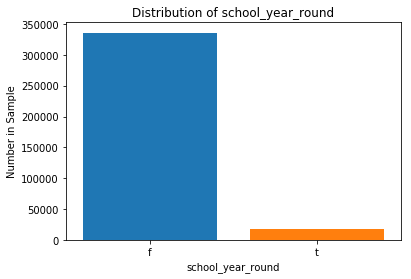

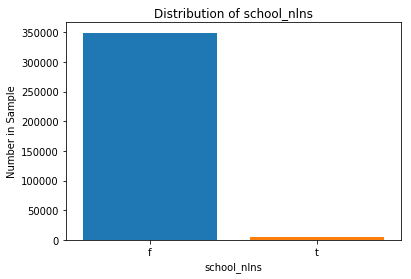

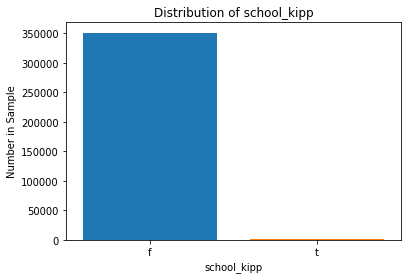

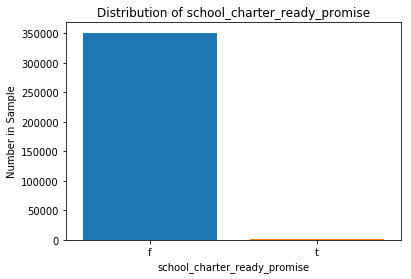

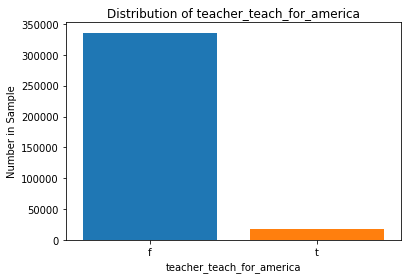

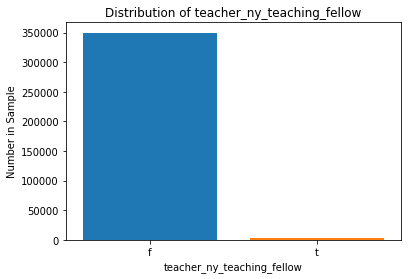

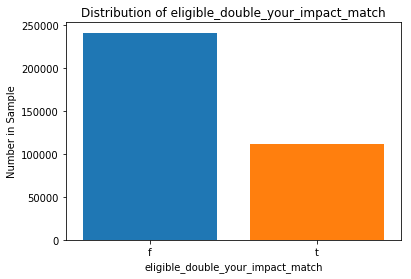

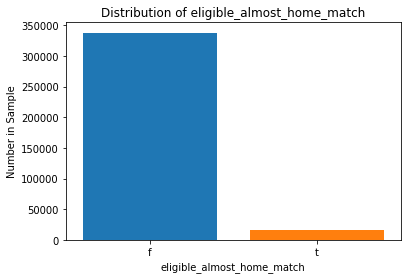

In [36]:
for col in BINARY:
    plot_hist(df, col, col)

### Plot Density of Continuous Variables

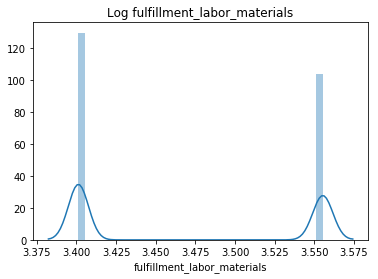

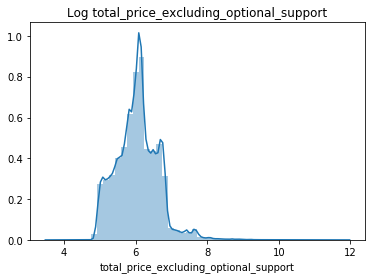

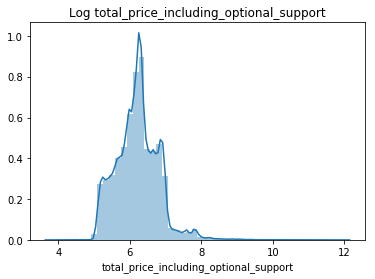

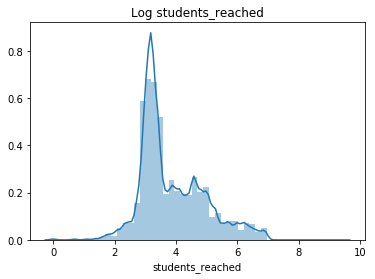

In [17]:
for col in OTHERS:
    if col not in ID:
        density_plot(df, col, log_=True)

## Run Preliminary Model and Validate Using Temporal Splits

### Data Pre-Processing Workflow will be implemented on training and test splits

In [19]:
c, v = CUTOFF_VAL_PAIRS[0]
train, test = temporal_split(df, DATE_COL, c, v)
cl_train, cl_test, features = pre_process(train, test)

Booleans converted: fully_funded
Dummified: school_state
Dummified: school_zip
Dummified: school_metro
Booleans converted: school_charter
Booleans converted: school_magnet
Booleans converted: school_year_round
Booleans converted: school_nlns
Booleans converted: school_kipp
Booleans converted: school_charter_ready_promise
Dummified: teacher_prefix
Booleans converted: teacher_teach_for_america
Booleans converted: teacher_ny_teaching_fellow
Dummified: primary_focus_subject
Dummified: primary_focus_area
Dummified: secondary_focus_subject
Dummified: secondary_focus_area
Dummified: resource_type
Dummified: grade_level
Normalizing: fulfillment_labor_materials
Normalizing: total_price_excluding_optional_support
Normalizing: total_price_including_optional_support
Missing values imputed: students_reached
Normalizing: students_reached
Booleans converted: eligible_double_your_impact_match
Booleans converted: eligible_almost_home_match
Getting month of date_posted


### Features

In [20]:
features

{'date_posted_month',
 'eligible_almost_home_match',
 'eligible_double_your_impact_match',
 'fulfillment_labor_materials',
 'grade_level_is_Grades 3-5',
 'grade_level_is_Grades 6-8',
 'grade_level_is_Grades 9-12',
 'grade_level_is_Grades PreK-2',
 'grade_level_is_nan',
 'grade_level_is_others',
 'primary_focus_area_is_Applied Learning',
 'primary_focus_area_is_Literacy & Language',
 'primary_focus_area_is_Math & Science',
 'primary_focus_area_is_Music & The Arts',
 'primary_focus_area_is_Special Needs',
 'primary_focus_area_is_nan',
 'primary_focus_area_is_others',
 'primary_focus_subject_is_Applied Sciences',
 'primary_focus_subject_is_Literacy',
 'primary_focus_subject_is_Literature & Writing',
 'primary_focus_subject_is_Mathematics',
 'primary_focus_subject_is_Special Needs',
 'primary_focus_subject_is_nan',
 'primary_focus_subject_is_others',
 'resource_type_is_Books',
 'resource_type_is_Other',
 'resource_type_is_Supplies',
 'resource_type_is_Technology',
 'resource_type_is_Trips'

### Test on two cutoff, validation date pairs

In [21]:
test_thyme = CUTOFF_VAL_PAIRS[:1]

In [22]:
tempura_validation_loop(df, test_thyme)

CUTOFF: 2011-06-30 VALIDATION: 2011-12-31
Booleans converted: fully_funded
Dummified: school_state
Dummified: school_zip
Dummified: school_metro
Booleans converted: school_charter
Booleans converted: school_magnet
Booleans converted: school_year_round
Booleans converted: school_nlns
Booleans converted: school_kipp
Booleans converted: school_charter_ready_promise
Dummified: teacher_prefix
Booleans converted: teacher_teach_for_america
Booleans converted: teacher_ny_teaching_fellow
Dummified: primary_focus_subject
Dummified: primary_focus_area
Dummified: secondary_focus_subject
Dummified: secondary_focus_area
Dummified: resource_type
Dummified: grade_level
Normalizing: fulfillment_labor_materials
Normalizing: total_price_excluding_optional_support
Normalizing: total_price_including_optional_support
Missing values imputed: students_reached
Normalizing: students_reached
Booleans converted: eligible_double_your_impact_match
Booleans converted: eligible_almost_home_match
Getting month of date

,model_type,clf,parameters,validation_date,train_set_size,validation_set_size,baseline,precision_at_5,precision_at_10,precision_at_20,recall_at_5,recall_at_10,recall_at_20,auc-roc
0,GB,([DecisionTreeRegressor(criterion='friedman_ms...,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",2011-12-31,47754,56442,0.740353,1.000000,1.000000,1.000000,0.067533,0.135066,0.270132,0.599365
1,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 1, 'max_features': 'sqrt', 'min_...",2011-12-31,47754,56442,0.740353,1.000000,1.000000,1.000000,0.067533,0.135066,0.270132,0.542655
2,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 1, 'max_fea...",2011-12-31,47754,56442,0.740353,1.000000,1.000000,1.000000,0.067533,0.135066,0.270132,0.534423
3,KNN,"KNeighborsClassifier(algorithm='auto', leaf_si...","{'algorithm': 'auto', 'n_neighbors': 5, 'weigh...",2011-12-31,47754,56442,0.740353,0.925585,0.897590,0.948795,0.062507,0.121234,0.256300,0.561626
4,LR,"LogisticRegression(C=0.01, class_weight=None, ...","{'C': 0.01, 'penalty': 'l1'}",2011-12-31,47754,56442,0.740353,0.809709,0.804394,0.808824,0.054682,0.108646,0.218489,0.592973
5,NB,GaussianNB(priors=None),{},2011-12-31,47754,56442,0.740353,0.790928,0.805457,0.783044,0.053414,0.108790,0.211525,0.563220


### Full results are below

/Users/hyeyeonchang/Documents/Spring-2018/Machine-Learning/machine-learning-2018/hw3/preprocess.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].apply(lambda x: 1 if x == val else 0)
/Users/hyeyeonchang/Documents/Spring-2018/Machine-Learning/machine-learning-2018/hw3/preprocess.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col_name] = df[col].apply(lambda x: 1 if x == val else 0)
/Users/hyeyeonchang/Documents/Spring-2018/Machine-Learning/machine-learning-2018/hw3/preprocess.py:219: SettingWithCopyWarning: 


GB


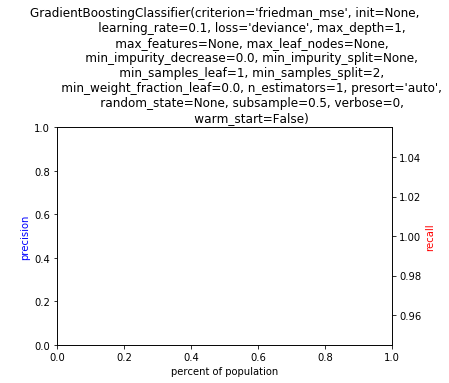

RF


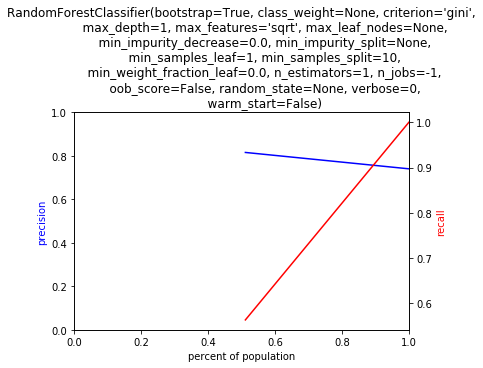

DT


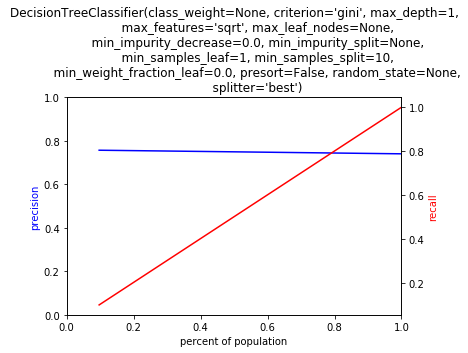

KNN


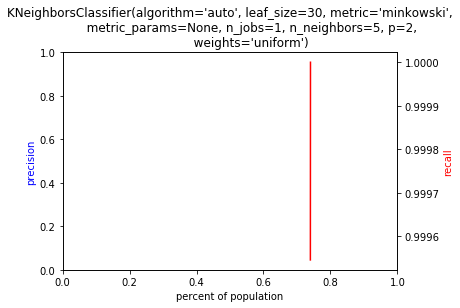

LR


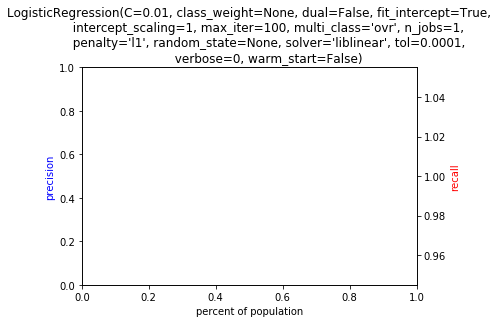

NB


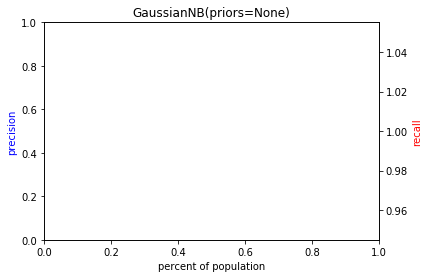

/Users/hyeyeonchang/Documents/Spring-2018/Machine-Learning/machine-learning-2018/hw3/preprocess.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].apply(lambda x: 1 if x == val else 0)
/Users/hyeyeonchang/Documents/Spring-2018/Machine-Learning/machine-learning-2018/hw3/preprocess.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col_name] = df[col].apply(lambda x: 1 if x == val else 0)
/Users/hyeyeonchang/Documents/Spring-2018/Machine-Learning/machine-learning-2018/hw3/preprocess.py:219: SettingWithCopyWarning: 


GB


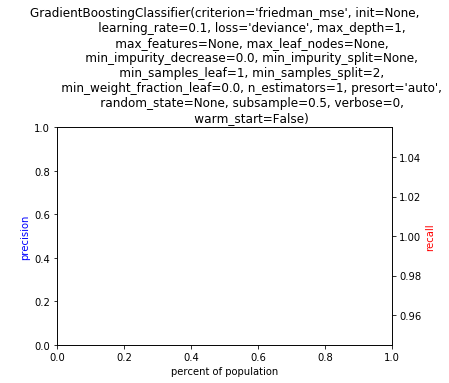

RF


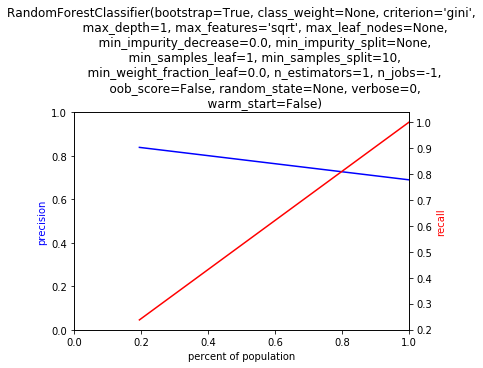

DT


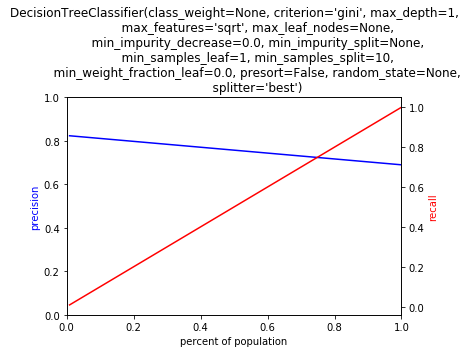

KNN


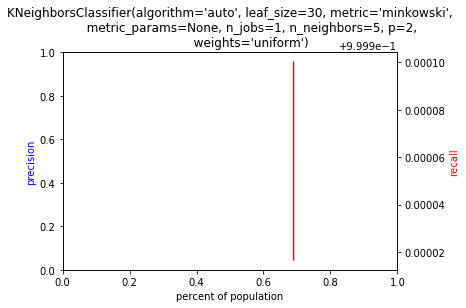

LR


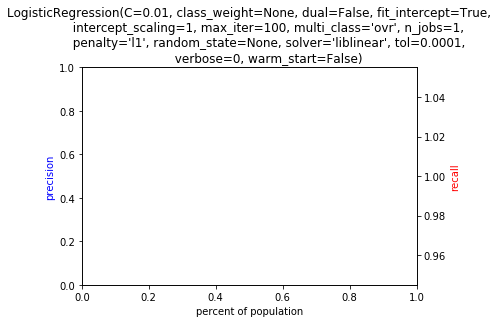

NB


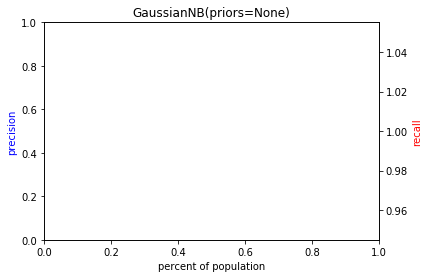

/Users/hyeyeonchang/Documents/Spring-2018/Machine-Learning/machine-learning-2018/hw3/preprocess.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].apply(lambda x: 1 if x == val else 0)
/Users/hyeyeonchang/Documents/Spring-2018/Machine-Learning/machine-learning-2018/hw3/preprocess.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col_name] = df[col].apply(lambda x: 1 if x == val else 0)
/Users/hyeyeonchang/Documents/Spring-2018/Machine-Learning/machine-learning-2018/hw3/preprocess.py:219: SettingWithCopyWarning: 


GB


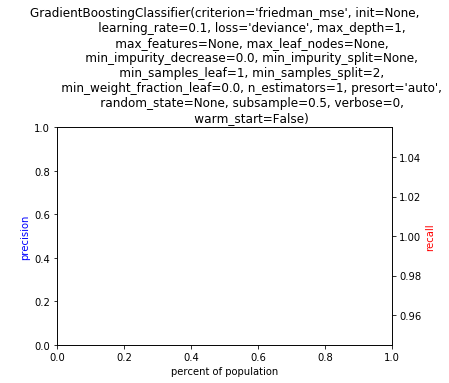

RF


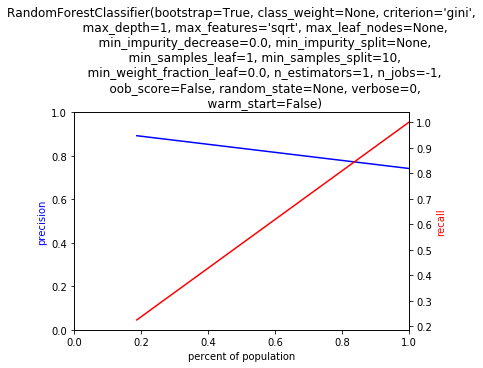

DT


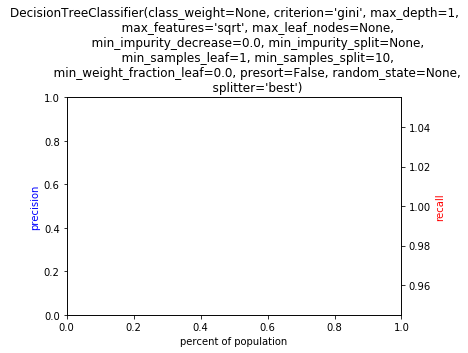

KNN


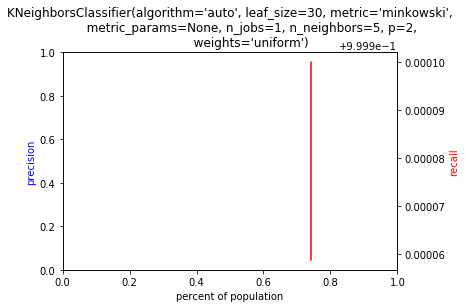

LR


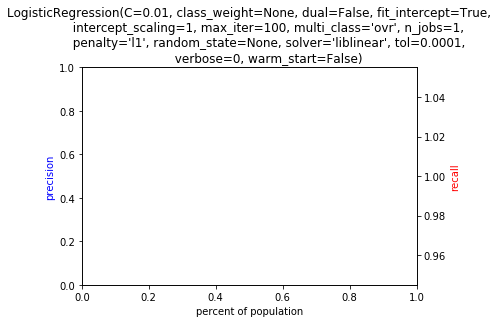

NB


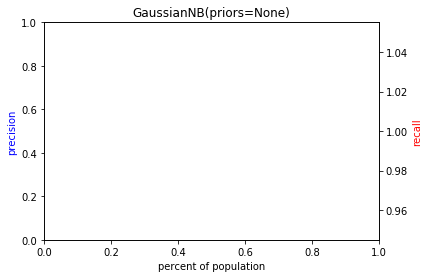

/Users/hyeyeonchang/Documents/Spring-2018/Machine-Learning/machine-learning-2018/hw3/preprocess.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].apply(lambda x: 1 if x == val else 0)
/Users/hyeyeonchang/Documents/Spring-2018/Machine-Learning/machine-learning-2018/hw3/preprocess.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col_name] = df[col].apply(lambda x: 1 if x == val else 0)
/Users/hyeyeonchang/Documents/Spring-2018/Machine-Learning/machine-learning-2018/hw3/preprocess.py:219: SettingWithCopyWarning: 


GB


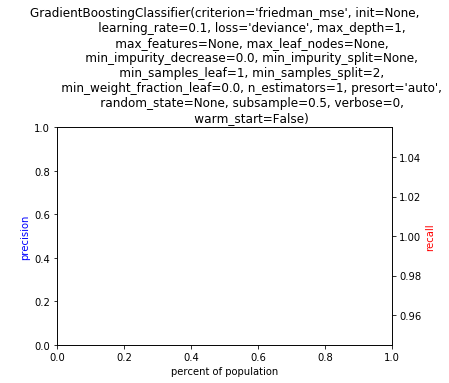

RF


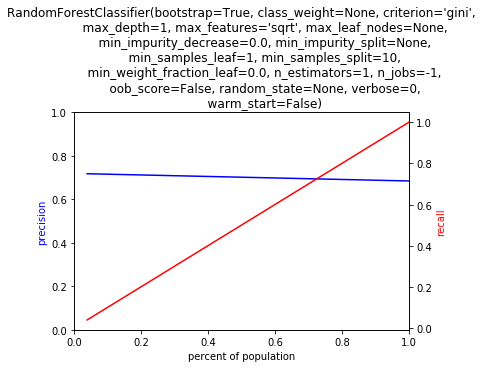

DT


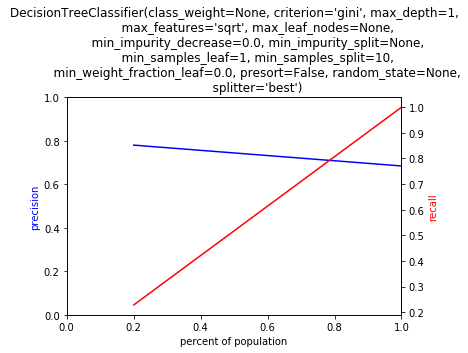

KNN


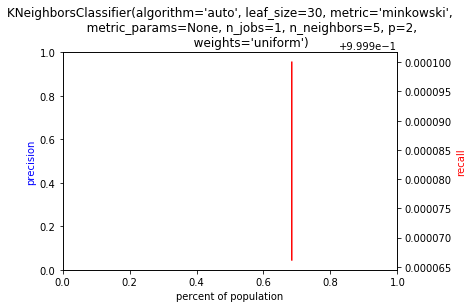

LR


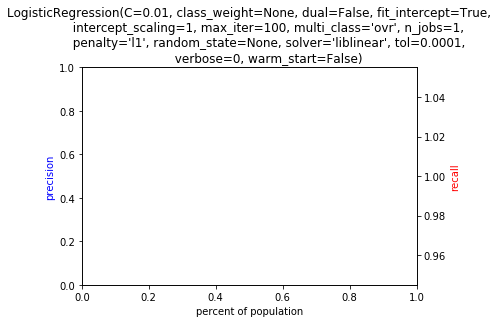

NB


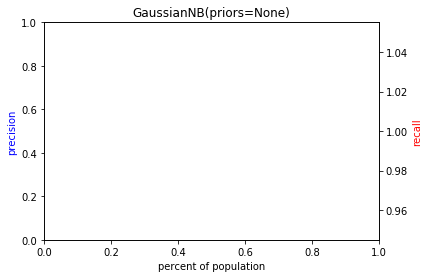

/Users/hyeyeonchang/Documents/Spring-2018/Machine-Learning/machine-learning-2018/hw3/preprocess.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col] = df[col].apply(lambda x: 1 if x == val else 0)
/Users/hyeyeonchang/Documents/Spring-2018/Machine-Learning/machine-learning-2018/hw3/preprocess.py:186: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col_name] = df[col].apply(lambda x: 1 if x == val else 0)
/Users/hyeyeonchang/Documents/Spring-2018/Machine-Learning/machine-learning-2018/hw3/preprocess.py:219: SettingWithCopyWarning: 


GB


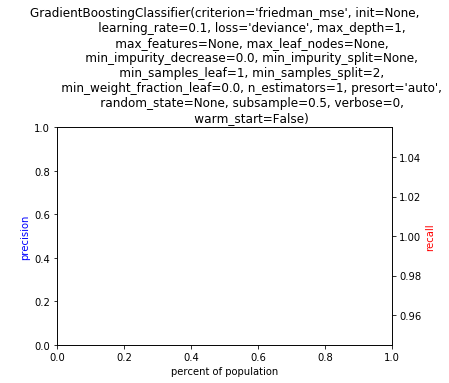

RF


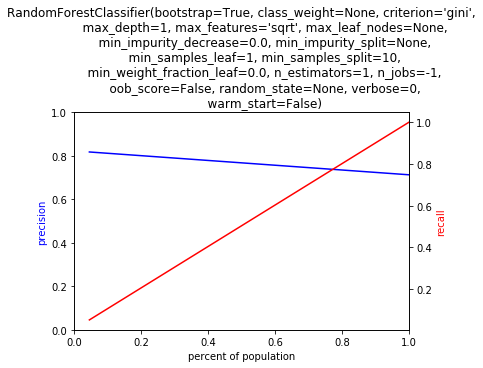

DT


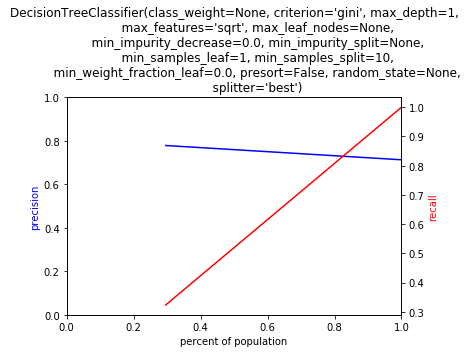

KNN


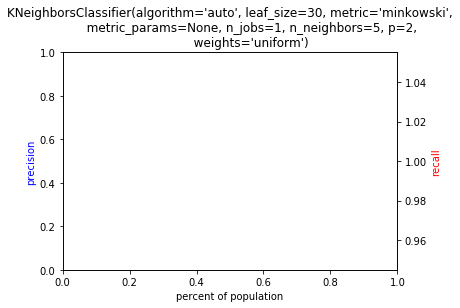

LR


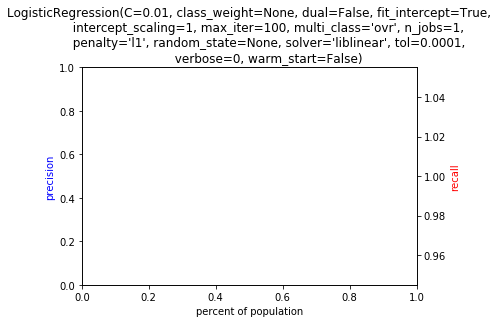

NB


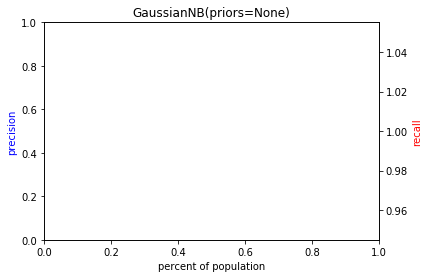

In [5]:
#results = tempura_validation_loop(df, TEST_GRID)

In [7]:
results.to_pickle('data/prelim_results.pkl')

In [10]:
results

,model_type,clf,parameters,validation_date,train_set_size,validation_set_size,baseline,precision_at_5,precision_at_10,precision_at_20,recall_at_5,recall_at_10,recall_at_20,auc-roc
0,GB,([DecisionTreeRegressor(criterion='friedman_ms...,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",2011-12-31,47754,56442,"(0.74035292867, 0.74035292867, 1.0)",1.000000,1.000000,1.000000,0.067533,0.135066,0.270132,1.000000
1,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 1, 'max_features': 'sqrt', 'min_...",2011-12-31,47754,56442,"(0.74035292867, 0.74035292867, 1.0)",1.000000,1.000000,1.000000,0.067533,0.135066,0.270132,0.600188
2,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 1, 'max_fea...",2011-12-31,47754,56442,"(0.74035292867, 0.74035292867, 1.0)",1.000000,0.764174,0.882087,0.067533,0.103214,0.238280,0.504174
3,KNN,"KNeighborsClassifier(algorithm='auto', leaf_si...","{'algorithm': 'auto', 'n_neighbors': 5, 'weigh...",2011-12-31,47754,56442,"(0.74035292867, 0.74035292867, 1.0)",1.000000,1.000000,1.000000,0.067533,0.135066,0.270132,1.000000
4,LR,"LogisticRegression(C=0.01, class_weight=None, ...","{'C': 0.01, 'penalty': 'l1'}",2011-12-31,47754,56442,"(0.74035292867, 0.74035292867, 1.0)",1.000000,1.000000,1.000000,0.067533,0.135066,0.270132,1.000000
5,NB,GaussianNB(priors=None),{},2011-12-31,47754,56442,"(0.74035292867, 0.74035292867, 1.0)",1.000000,1.000000,1.000000,0.067533,0.135066,0.270132,1.000000
6,GB,([DecisionTreeRegressor(criterion='friedman_ms...,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",2012-06-30,104196,52185,"(0.689776755773, 0.689776755773, 1.0)",1.000000,1.000000,1.000000,0.072480,0.144961,0.289949,1.000000
7,RF,"(DecisionTreeClassifier(class_weight=None, cri...","{'max_depth': 1, 'max_features': 'sqrt', 'min_...",2012-06-30,104196,52185,"(0.689776755773, 0.689776755773, 1.0)",1.000000,1.000000,0.842963,0.072480,0.144961,0.244416,0.567976
8,DT,"DecisionTreeClassifier(class_weight=None, crit...","{'criterion': 'gini', 'max_depth': 1, 'max_fea...",2012-06-30,104196,52185,"(0.689776755773, 0.689776755773, 1.0)",0.969337,0.984668,0.992335,0.070258,0.142738,0.287726,0.502710
9,KNN,"KNeighborsClassifier(algorithm='auto', leaf_si...","{'algorithm': 'auto', 'n_neighbors': 5, 'weigh...",2012-06-30,104196,52185,"(0.689776755773, 0.689776755773, 1.0)",1.000000,1.000000,1.000000,0.072480,0.144961,0.289949,1.000000
